# Kapitel 3 - Beispiel 1: Brückenquerträger

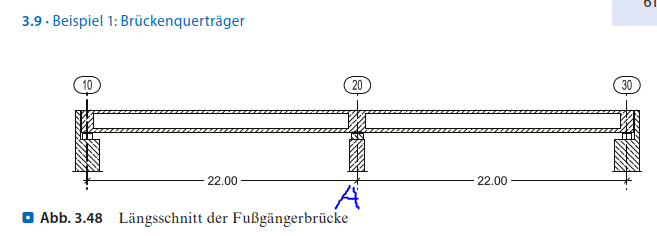

In [1]:
import math

In [2]:
# input

# materials
fck = 35 # N/mm²
fyk = 500 # N/mm²

# geometry
cnom = 45 # mm
l1=22 # m

# loads
gk1 = 108.5 # kN/m
gk2 = 20 # kN/m
qk = 37.5 # kN/m

## Auflagerkraft

In [3]:
# Auflagerkraft A

gd = 1.35*gk1 + 1.35 * gk2
qd = 1.5*qk
qd_ges = round(gd + qd)

Aed20=1.25 * l1 * qd_ges # Schneider
print(Aed20,qd_ges)

6325.0 230


## Strebenkräfte

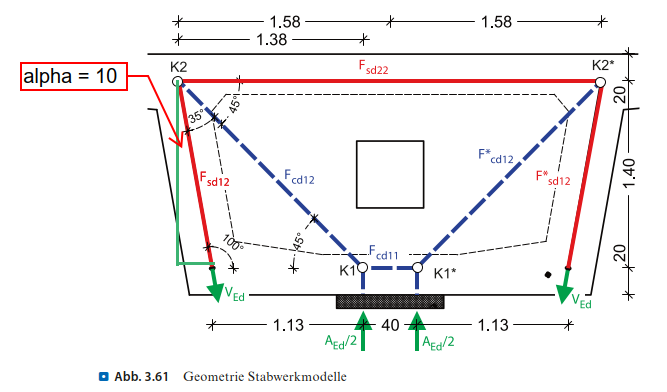

In [4]:
# Trigonometrie

# Gegenkathete Sinus
def gegenkathete_sin(alpha, hypotenuse):
    alpha_rad = math.radians(alpha)
    return math.sin(alpha_rad) * hypotenuse

# Hypotenuse Sinus
def hypotenuse_sin(alpha, gegenkathete):
    alpha_rad = math.radians(alpha)
    return gegenkathete / math.sin(alpha_rad)

# Ankathete Cosinus
def ankathete_cos(alpha, hypotenuse):
    alpha_rad = math.radians(alpha)
    return math.cos(alpha_rad) * hypotenuse

# Hypotenuse Cosinus
def hypotenuse_cos(alpha, ankathete):
    alpha_rad = math.radians(alpha)
    return ankathete / math.cos(alpha_rad)    

In [5]:
# As erf
def asErf_Zugstrebe(Fsd, fyd):
    return Fsd / fyd

In [6]:
# Fcd12
Fcd12_raw = hypotenuse_sin(45, 6325/2)
Fcd12_rounded = round(Fcd12_raw,1)
print(f"Fcd12 = {Fcd12_rounded} kN")

# Fcd11
Fcd11_raw = gegenkathete_sin(45, Fcd12_rounded)
Fcd11_rounded = round(Fcd11_raw,1)
print(f"Fcd11 = {Fcd11_rounded} kN")

# Fsd12
Fsd12_raw = hypotenuse_cos(10, 6325/2)
Fsd12_rounded = round(Fsd12_raw,1)
print(f"Fsd12 = {Fsd12_rounded} kN")

# Fsd 22
Fcd12_ankathete = ankathete_cos(45, Fcd12_rounded)
Fcd12_ankathete_rounded = round(Fcd12_ankathete,1)

Fsd12_gegenkathete = gegenkathete_sin(10, Fsd12_rounded)
Fsd12_gegenkathete_rounded = round(Fsd12_gegenkathete,1)

Fsd22_raw = Fcd12_ankathete_rounded - Fsd12_gegenkathete_rounded
Fsd22_rounded = round(Fsd22_raw,1)
print(f"Fsd22 = {Fsd22_rounded} kN")

Fcd12 = 4472.5 kN
Fcd11 = 3162.5 kN
Fsd12 = 3211.3 kN
Fsd22 = 2604.9 kN


## Bemessung der Zugstrebe

In [7]:
As_22 = asErf_Zugstrebe(Fsd22_rounded, 43.5)
As_22_rounded = round(As_22,1)
print(f"As_22 = {As_22_rounded} mm²")

As_12 = asErf_Zugstrebe(Fsd12_rounded, 43.5)
As_12_rounded = round(As_12,1)
print(f"As_12 = {As_12_rounded} mm²")

As_22 = 59.9 mm²
As_12 = 73.8 mm²


## Bemessung der Druckstrebe

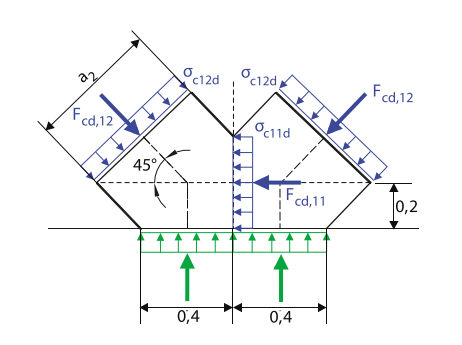

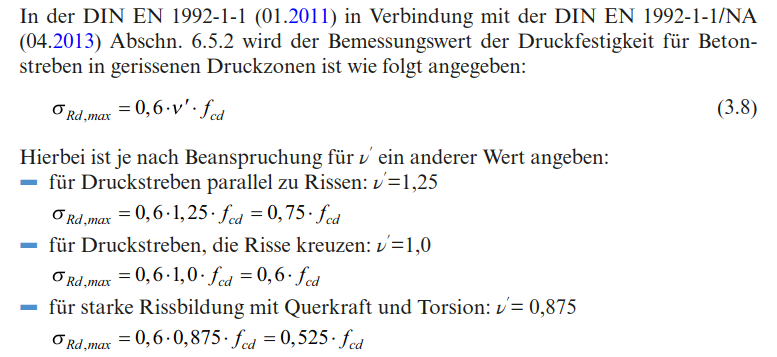

In [8]:
# Betonspannung
def sigma_cd (F_Beton, a, b):
    return F_Beton / (a * b) 

# Druckfestigkeit für Betonstreben in gerissenen Druckzonen
def sigma_rd_max_gerissen(v, fcd):
    return 0.6 * v * fcd

# Druckfestigkeit für reine Druckknoten
def sigma_rd_max_druckknoten(v, fcd):
    return 1.1 * v * fcd

# Bemessungwert der Betondruckfestigkeit    
def fcd(alpha_cc, fck, gamma_c):
    return alpha_cc * fck / gamma_c

# Nachweis Auswertung
def nachweis(sigma_ed, sigma_rd):
    if sigma_ed <= sigma_rd:
        return f"Nachweis erbracht: {sigma_ed} MN/m² <= {sigma_rd} MN/m²"
    else:
        return f"Nachweis nicht erbracht: {sigma_ed} MN/m² > {sigma_rd} MN/m²"

In [9]:
# tiefe der Druckstrebe
b1 = 0.8 # m

# Breite der Druckstrebe in Ansichtsrichtung
a2 = hypotenuse_cos(45, 0.4)
a2 = round(a2,2) # m
print(f"a2 = {a2} m")

# Spannung in der Druckstrebe
sigma_cd_12 = sigma_cd(Fcd12_rounded/1000, b1, a2)
sigma_cd_12 = round(sigma_cd_12,2)
print(f"sigma_cd_12 = {sigma_cd_12} MN/m²")

# Max. aufnehmbare Spannung
fcd_35 = fcd(0.85, fck, 1.5)
fcd_35 = round(fcd_35,2)
print(f"fcd_35 = {fcd_35} MN/m²")

sigma_rd_max_35 = sigma_rd_max_gerissen(1, fcd_35) 
sigma_rd_max_35 = round(sigma_rd_max_35,2)  
print(f"sigma_rd_max_35 = {sigma_rd_max_35} MN/m²")

# Nachweis
nachweis_Druckstrebe = nachweis(sigma_cd_12, sigma_rd_max_35)
print(nachweis_Druckstrebe)

a2 = 0.57 m
sigma_cd_12 = 9.81 MN/m²
fcd_35 = 19.83 MN/m²
sigma_rd_max_35 = 11.9 MN/m²
Nachweis erbracht: 9.81 MN/m² <= 11.9 MN/m²


## Bemessung der Knoten


In [10]:
# Nachweis Knoten 1: Reiner Druckknoten
sigma_cd_11 = sigma_cd(Fcd11_rounded/1000, b1, 0.4)
sigma_cd_11 = round(sigma_cd_11,1)
print(f"sigma_cd_11 = {sigma_cd_11} MN/m²")

# Sigma Rd max
sigma_rd_max_11 = sigma_rd_max_druckknoten(1, fcd_35)
sigma_rd_max_11 = round(sigma_rd_max_11,1)  
print(f"sigma_rd_max_11 = {sigma_rd_max_11} MN/m²")

# Nachweis
nachweis_Knoten1 = nachweis(sigma_cd_11, sigma_rd_max_11)
print(nachweis_Knoten1)

sigma_cd_11 = 9.9 MN/m²
sigma_rd_max_11 = 21.8 MN/m²
Nachweis erbracht: 9.9 MN/m² <= 21.8 MN/m²


Knoten 2 \
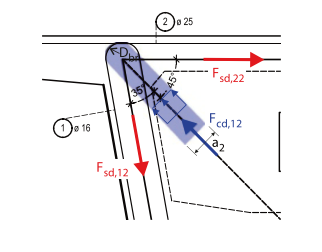